In [ ]:
import requests
from bs4 import BeautifulSoup
import boto3

comprehend = boto3.client('comprehend', region_name='us-west-2')

URL = "https://twstalker.com/Bell" # pour l'entreprise qui parle d'elle-même
URL = "https://twstalker.com/search/bell-canada" # pour les clients qui en parlent
page = requests.get(URL)

if page.status_code == 200:
    print("Page récupérée avec succès.")
else:
    print(f"Erreur lors de la récupération de la page. Code d'erreur : {page.status_code}")

soup = BeautifulSoup(page.content, "html.parser")

tweets = []
job_elements = soup.find_all("p")

nb_tweets = 30

for i, job_element in enumerate(job_elements[:nb_tweets+1]):
    element = job_element.text
    tweets.append(element)

tweets.remove(tweets[0])
print(f"Nombre de tweets extraits : {len(tweets)}")

positive_tweets = 0
negative_tweets = 0
neutral_tweets = 0
mixed_tweets = 0

sample_positive = None
sample_negative = None
sample_neutral = None
sample_mixed = None

def classify_sentiment_comprehend(tweet):
    response = comprehend.detect_sentiment(Text=tweet, LanguageCode='en')
    sentiment = response['Sentiment']
    return sentiment

for tweet in tweets:
    sentiment = classify_sentiment_comprehend(tweet)
    if sentiment == 'POSITIVE':
        positive_tweets += 1
        if sample_positive is None:
            sample_positive = tweet
    elif sentiment == 'NEGATIVE':
        negative_tweets += 1
        if sample_negative is None:
            sample_negative = tweet
    elif sentiment == 'NEUTRAL':
        neutral_tweets += 1
        if sample_neutral is None:
            sample_neutral = tweet
    elif sentiment == 'MIXED':
        mixed_tweets += 1
        if sample_mixed is None:
            sample_mixed = tweet

total_tweets = len(tweets)
if total_tweets > 0:
    positive_ratio = positive_tweets / total_tweets
    negative_ratio = negative_tweets / total_tweets
    neutral_ratio = neutral_tweets / total_tweets
    mixed_ratio = mixed_tweets / total_tweets
    
    print(f"\nRatio de tweets positifs : {positive_ratio:.2%}")
    print(f"Ratio de tweets négatifs : {negative_ratio:.2%}")
    print(f"Ratio de tweets neutres : {neutral_ratio:.2%}")
    print(f"Ratio de tweets mixtes : {mixed_ratio:.2%}")
else:
    print("Aucun tweet à analyser.")

print(f"\nNombre de tweets positifs : {positive_tweets}")
print(f"Nombre de tweets négatifs : {negative_tweets}")
print(f"Nombre de tweets neutres : {neutral_tweets}")
print(f"Nombre de tweets mixtes : {mixed_tweets}")

print("\nExemple de tweet positif :", sample_positive)
print("Exemple de tweet négatif :", sample_negative)
print("Exemple de tweet neutre :", sample_neutral)
print("Exemple de tweet mixte :", sample_mixed)


Page récupérée avec succès.
Nombre de tweets extraits : 16

Ratio de tweets positifs : 12.50%
Ratio de tweets négatifs : 18.75%
Ratio de tweets neutres : 62.50%
Ratio de tweets mixtes : 6.25%

Nombre de tweets positifs : 2
Nombre de tweets négatifs : 3
Nombre de tweets neutres : 10
Nombre de tweets mixtes : 1

Exemple de tweet positif : When I sold my Bell Canada stock, I moved the proceeds to a U.S. Quality ETF that had a favourable valuation, and a wonderful volatility history. Take a look ... cutthecrapinvesting.com/2024/10/20/ish… 
Exemple de tweet négatif : @VirginPlus I am not impressed. Your modem dies on me and “support” tells me I have to bring your equipment to a #bell #canada store.

How much am I paying you so I can do your job?

#fail #virgin #badservice 
Exemple de tweet neutre : @SamiParvezQadir @Bell Hi Sami, thank you for your inquiry. That does not appear to be coming from Bell Canada. If you have any other questions, please send us a DM. ^JL 
Exemple de tweet mixte :

In [ ]:
import requests
from bs4 import BeautifulSoup
import boto3
import matplotlib.pyplot as plt
import numpy as np

comprehend = boto3.client('comprehend', region_name='us-west-2')

def colormap(nom):

    fig, ax = plt.subplots(figsize=(10, 2))
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))

    for type in {"clients", nom}:
        if type == nom:
            URL = f"https://twstalker.com/{nom}"
        else:
            URL = f"https://twstalker.com/search/{nom}"
        
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, "html.parser")

        tweets = []
        job_elements = soup.find_all("p")

        nb_tweets = 30

        for i, job_element in enumerate(job_elements[:nb_tweets]):
            element = job_element.text
            tweets.append(element)

        tweets = tweets[1:] # bug sur le premier élément de l'extraction
        print(f"Nombre de tweets extraits ({type}) : {len(tweets)}")

        positive_tweets = 0
        negative_tweets = 0
        neutral_tweets = 0
        mixed_tweets = 0

        sample_positive = None
        sample_negative = None
        sample_neutral = None
        sample_mixed = None

        def classify_sentiment_comprehend(tweet):
            response = comprehend.detect_sentiment(Text=tweet, LanguageCode='en')
            sentiment = response['Sentiment']
            return sentiment

        for tweet in tweets:
            sentiment = classify_sentiment_comprehend(tweet)
            if sentiment == 'POSITIVE':
                positive_tweets += 1
                if sample_positive is None:
                    sample_positive = tweet
            elif sentiment == 'NEGATIVE':
                negative_tweets += 1
                if sample_negative is None:
                    sample_negative = tweet
            elif sentiment == 'NEUTRAL':
                neutral_tweets += 1
                if sample_neutral is None:
                    sample_neutral = tweet
            elif sentiment == 'MIXED':
                mixed_tweets += 1
                if sample_mixed is None:
                    sample_mixed = tweet

        total_tweets = len(tweets)
        if total_tweets > 0:
            positive_ratio = positive_tweets / total_tweets
            negative_ratio = negative_tweets / total_tweets
            neutral_ratio = neutral_tweets / total_tweets
            mixed_ratio = mixed_tweets / total_tweets
            
            print(f"Ratio de tweets positifs : {positive_ratio:.2%}")
            print(f"Ratio de tweets négatifs : {negative_ratio:.2%}")
            print(f"Ratio de tweets neutres : {neutral_ratio:.2%}")
            print(f"Ratio de tweets mixtes : {mixed_ratio:.2%}\n")
        else:
            print("Aucun tweet à analyser.")
            
        cursor_position = positive_ratio - negative_ratio

        ax.imshow(gradient, aspect='auto', cmap=plt.cm.RdYlGn, extent=[0, 1, 0, 1])

        ax.annotate(f'{nom}\n(selon {type})', xy=((cursor_position + 1) / 2, 0.5), xytext=((cursor_position + 1) / 2, 0.7),
                    arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Analyse de Sentiment des Tweets : Rouge (100% Négatif) à Vert (100% Positif)')
    plt.show()

Nombre de tweets extraits (clients) : 18
Ratio de tweets positifs : 5.56%
Ratio de tweets négatifs : 50.00%
Ratio de tweets neutres : 38.89%
Ratio de tweets mixtes : 5.56%

Nombre de tweets extraits (Bell) : 14
Ratio de tweets positifs : 78.57%
Ratio de tweets négatifs : 0.00%
Ratio de tweets neutres : 21.43%
Ratio de tweets mixtes : 0.00%



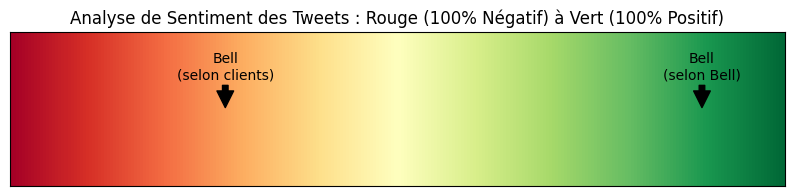

In [ ]:
colormap("Bell")

In [33]:
import requests
from bs4 import BeautifulSoup
import boto3
import matplotlib.pyplot as plt
import numpy as np
import random

comprehend = boto3.client('comprehend', region_name='us-west-2')

def multi_colormap(liste_nom):
    # Créer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 2))
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))

    # Afficher le gradient en fond
    ax.imshow(gradient, aspect='auto', cmap=plt.cm.RdYlGn, extent=[0, 1, 0, 1])

    y_offset = 0.7  # Offset initial pour la légende

    colors = plt.cm.tab20.colors  # Palette de couleurs pour les points

    for idx, nom in enumerate(liste_nom):
        URL = f"https://twstalker.com/search/{nom}"
        page = requests.get(URL)
        soup = BeautifulSoup(page.content, "html.parser")
        tweets = []
        job_elements = soup.find_all("p")
        nb_tweets = 30

        for i, job_element in enumerate(job_elements[:nb_tweets]):
            element = job_element.text
            tweets.append(element)

        # Supprimer le premier élément qui cause un bug
        tweets = tweets[1:]
        print(f"Nombre de tweets extraits ({nom}) : {len(tweets)}")

        positive_tweets = 0
        negative_tweets = 0
        neutral_tweets = 0
        mixed_tweets = 0

        def classify_sentiment_comprehend(tweet):
            response = comprehend.detect_sentiment(Text=tweet, LanguageCode='en')
            sentiment = response['Sentiment']
            return sentiment

        for tweet in tweets:
            sentiment = classify_sentiment_comprehend(tweet)
            if sentiment == 'POSITIVE':
                positive_tweets += 1
            elif sentiment == 'NEGATIVE':
                negative_tweets += 1
            elif sentiment == 'NEUTRAL':
                neutral_tweets += 1
            elif sentiment == 'MIXED':
                mixed_tweets += 1

        total_tweets = len(tweets)
        if total_tweets > 0:
            positive_ratio = positive_tweets / total_tweets
            negative_ratio = negative_tweets / total_tweets
            neutral_ratio = neutral_tweets / total_tweets
            mixed_ratio = mixed_tweets / total_tweets
            
            print(f"Ratio de tweets positifs : {positive_ratio:.2%}")
            print(f"Ratio de tweets négatifs : {negative_ratio:.2%}")
            print(f"Ratio de tweets neutres : {neutral_ratio:.2%}")
            print(f"Ratio de tweets mixtes : {mixed_ratio:.2%}\n")
        else:
            print("Aucun tweet à analyser.")

        # Calculer la position du point sur la colormap
        cursor_position = positive_ratio - negative_ratio
        point_x = (cursor_position + 1) / 2

        # Ajouter un point coloré sur l'axe
        point_color = colors[idx % len(colors)]
        ax.plot([point_x], [0.5], 'o', color=point_color, markersize=8)

        # Améliorer la légende avec un point coloré à côté du nom
        ax.text(1.05, y_offset, f'\u25CF {nom}', color=point_color, transform=ax.transAxes, 
                verticalalignment='center', fontsize=10)
        y_offset -= 0.15  # Espacement entre les noms dans la légende

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Analyse de Sentiment des Tweets : Rouge (100% Négatif) à Vert (100% Positif)')
    plt.show()


Nombre de tweets extraits (Mercedes) : 17
Ratio de tweets positifs : 11.76%
Ratio de tweets négatifs : 35.29%
Ratio de tweets neutres : 52.94%
Ratio de tweets mixtes : 0.00%

Nombre de tweets extraits (Tesla) : 14
Ratio de tweets positifs : 7.14%
Ratio de tweets négatifs : 21.43%
Ratio de tweets neutres : 71.43%
Ratio de tweets mixtes : 0.00%



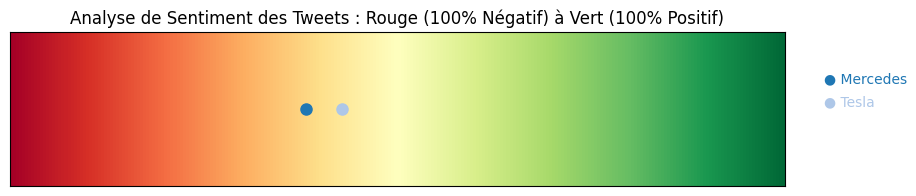

In [34]:
multi_colormap(["Mercedes", "Tesla"])
